In [332]:
import sklearn as sk
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
SAVEFIG = False

In [334]:
c_blue = "#023d6b"
c_red = "#eb5f73"
c_green = "#b9d25f"
c_orange = "#fab45a"
c_gray = "xkcd:gray"

### Semi-Supervised

In [335]:
n_samples = 200
X, y = make_moons(n_samples=n_samples, shuffle=False)

# add noise to X
X += np.random.normal(scale=0.04, size=X.shape)

In [336]:
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
lix1 = int(np.random.choice(n_samples//4, size=1, replace=False))
lix2 = int(np.random.choice(n_samples//4, size=1, replace=False) + n_samples//2)
labels[lix1] = outer
labels[lix2] = inner

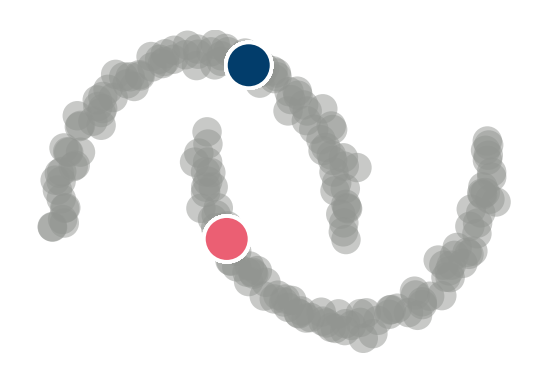

In [337]:
plt.figure(figsize=(2.1,1.4), dpi=300)
ls = 120
ns = 50
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette=[c_gray, c_blue, c_red], legend=False, s=ns, alpha=0.5, linewidth=0.0)
sns.scatterplot(x=X[lix1,0], y=X[lix1,1], hue=labels, palette=[c_blue, c_gray, c_gray], legend=False, s=ls)
sns.scatterplot(x=X[lix2,0], y=X[lix2,1], hue=labels, palette=[c_red, c_gray, c_gray], legend=False, s=ls)

for loc in ['right', 'top', 'left', 'bottom']:
    plt.gca().spines[loc].set_visible(False)
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

if SAVEFIG: plt.savefig("../figures/semi-supervised.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

### Unsupervised

In [338]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

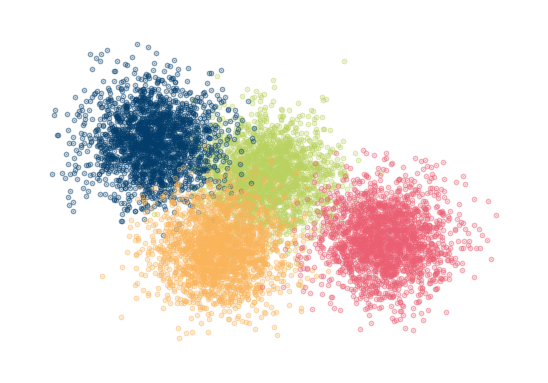

In [339]:
n_samples = 8000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=1, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
plt.figure(figsize=(2.1,1.4), dpi=300)
colors = [c_green, c_blue, c_orange, c_red]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=.5, alpha=0.5)

for loc in ['right', 'top', 'left', 'bottom']:
    plt.gca().spines[loc].set_visible(False)
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.xticks([])
plt.yticks([])
if SAVEFIG: plt.savefig("../figures/unsupervised.png", bbox_inches='tight',  pad_inches=0.1)
plt.show()

In [342]:
from sklearn.cluster import KMeans
import time
from sklearn.metrics.pairwise import pairwise_distances_argmin

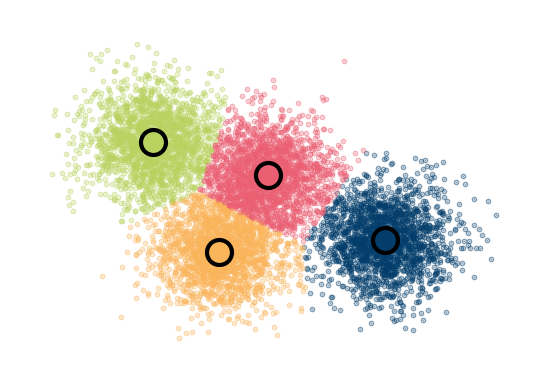

In [373]:
k_means = KMeans(init="k-means++", n_clusters=n_components, n_init=10).fit(X)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

# KMeans
fig = plt.figure(figsize=(2.1,1.4), dpi=300)

for k, col in zip(range(n_components), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker=".", s=.5, alpha=0.5)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
for loc in ['right', 'top', 'left', 'bottom']:
    plt.gca().spines[loc].set_visible(False)
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
if SAVEFIG: plt.savefig("../figures/unsupervised_kmeans.png", bbox_inches='tight',  pad_inches=0.1)
plt.show()
